In [ ]:
#1. Install and Import Dependencies

In [4]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
# 2. Load Model

In [1]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

NameError: name 'torch' is not defined

In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [5]:
#3. Make Detections with Images

In [11]:
img = "https://cdn.vox-cdn.com/thumbor/0ma2o-VojU7ZmJb1yTd3Mxg-l5g=/232x0:2999x2075/1200x800/filters:focal(232x0:2999x2075)/cdn.vox-cdn.com/uploads/chorus_image/image/44219366/72499026.0.0.jpg"

In [12]:
results = model(img)
results.print()

image 1/1: 800x1200 21 cars, 2 trucks
Speed: 1069.2ms pre-process, 229.0ms inference, 6.0ms NMS per image at shape (1, 3, 448, 640)


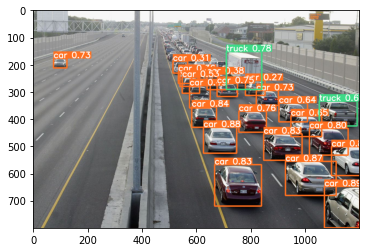

In [13]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [14]:
results.render()


[array([[[140, 143, 134],
         [129, 132, 123],
         [126, 129, 120],
         ...,
         [247, 247, 247],
         [248, 248, 250],
         [249, 249, 251]],
 
        [[119, 122, 113],
         [126, 129, 120],
         [126, 129, 120],
         ...,
         [247, 247, 247],
         [247, 247, 249],
         [248, 248, 250]],
 
        [[119, 122, 113],
         [132, 135, 126],
         [130, 133, 124],
         ...,
         [247, 247, 247],
         [247, 247, 249],
         [248, 248, 250]],
 
        ...,
 
        [[107, 108, 110],
         [104, 105, 107],
         [ 99, 100, 102],
         ...,
         [255, 112,  31],
         [255, 112,  31],
         [255, 112,  31]],
 
        [[101, 102, 104],
         [107, 108, 110],
         [110, 111, 113],
         ...,
         [255, 112,  31],
         [255, 112,  31],
         [255, 112,  31]],
 
        [[102, 103, 105],
         [102, 103, 105],
         [102, 103, 105],
         ...,
         [255, 112,  31],
  

In [ ]:
#4. Real Time Detections

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#5 Train from scratch

In [2]:
import uuid   # Unique identifier
import os
import time

In [12]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

Use Roboflow to generate all of the data sets, labels, data in yolo format.

In [13]:
!cd yolov5 && python train.py --img 416 --batch 16 --epochs 500 --data data.yaml --weights yolov5s.pt --workers 2

  File "train.py", line 1
SyntaxError: Non-ASCII character '\xf0' in file train.py on line 1, but no encoding declared; see http://python.org/dev/peps/pep-0263/ for details


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp4/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/quangngo/.cache/torch/hub/master.zip
/Users/quangngo/miniconda3/envs/pt/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: dlopen(/Users/quangngo/miniconda3/envs/pt/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libpng16.16.dylib
  Referenced from: /Users/quangngo/miniconda3/envs/pt/lib/python3.8/site-packages/torchvision/image.so
  Reason: tried: '/Users/quangngo/miniconda3/envs/pt/lib/libpng16.16.dylib' (no such file), '/Users/quangngo/miniconda3/envs/pt/lib/libpng16.16.dylib' (no such file), '/Users/quangngo/miniconda3/envs/pt/lib/python3.8/lib-dynload/../../libpng16.16.dylib' (no such file), '/Users/quangngo/miniconda3/envs/pt/lib/libpng16.16.dylib' (no such file), '/Users/quangngo/miniconda3/envs/pt/bin/../lib/libpng16.16.dylib' (no such file), '/usr/local/lib/libpng16.16.dylib' (no such file), '/usr/lib/l

ImportError: cannot import name 'distance' from 'scipy.spatial' (unknown location)

In [3]:
img = "data/test/images/maksssksksss471_png.rf.0fe75e64a67d2afec57ea9625d262025.jpg"
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

NameError: name 'model' is not defined

In [3]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'model' is not defined